Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../../data/bnd_buffer/1/'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [3]:
print("Data:")
print(df.shape)
df.head(15)

Data:
(10, 7)


,Iterations,NP,NC,IPP,BB,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,10,50,50,1000,60,3.005615e+01,49.861321
1,10,100,100,1000,120,6.532597e+01,53.324659
2,10,500,500,1000,600,3.812217e+02,193.781222
3,10,1000,1000,1000,1200,7.811063e+02,327.232727
4,10,5000,5000,1000,6000,4.719834e+03,2446.120644
5,10,10000,10000,1000,12000,9.614212e+03,6860.380407
6,10,50000,50000,1000,60000,5.213827e+04,21223.550179
7,10,100000,100000,1000,120000,9.778863e+04,76316.879104
8,10,500000,500000,1000,600000,5.151504e+05,203512.839235
9,10,1000000,1000000,1000,1200000,1.053338e+06,582241.003489


Add Custom Column for N and R

In [4]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

In [5]:
# Combine N (Number of Actors) and R (Number of Rounds) into a new column for x-axis label
df['NP_NC_IPP_BB'] = "(NP=" + df['NP'].apply(format_number_str) + ", NC=" + df['NC'].apply(format_number_str) + ", IPP=" + df['IPP'].apply(format_number_str) + ", BB=" + df['BB'].apply(format_number_str) + ")"
df.head(15)

,Iterations,NP,NC,IPP,BB,Erlang Energy Consumption(J),Scala Energy Consumption(J),NP_NC_IPP_BB
0,10,50,50,1000,60,3.005615e+01,49.861321,"(NP=50, NC=50, IPP=1K, BB=60)"
1,10,100,100,1000,120,6.532597e+01,53.324659,"(NP=100, NC=100, IPP=1K, BB=120)"
2,10,500,500,1000,600,3.812217e+02,193.781222,"(NP=500, NC=500, IPP=1K, BB=600)"
3,10,1000,1000,1000,1200,7.811063e+02,327.232727,"(NP=1K, NC=1K, IPP=1K, BB=1K)"
4,10,5000,5000,1000,6000,4.719834e+03,2446.120644,"(NP=5K, NC=5K, IPP=1K, BB=6K)"
5,10,10000,10000,1000,12000,9.614212e+03,6860.380407,"(NP=10K, NC=10K, IPP=1K, BB=12K)"
6,10,50000,50000,1000,60000,5.213827e+04,21223.550179,"(NP=50K, NC=50K, IPP=1K, BB=60K)"
7,10,100000,100000,1000,120000,9.778863e+04,76316.879104,"(NP=100K, NC=100K, IPP=1K, BB=120K)"
8,10,500000,500000,1000,600000,5.151504e+05,203512.839235,"(NP=500K, NC=500K, IPP=1K, BB=600K)"
9,10,1000000,1000000,1000,1200000,1.053338e+06,582241.003489,"(NP=1M, NC=1M, IPP=1K, BB=1M)"


Visualize the Data

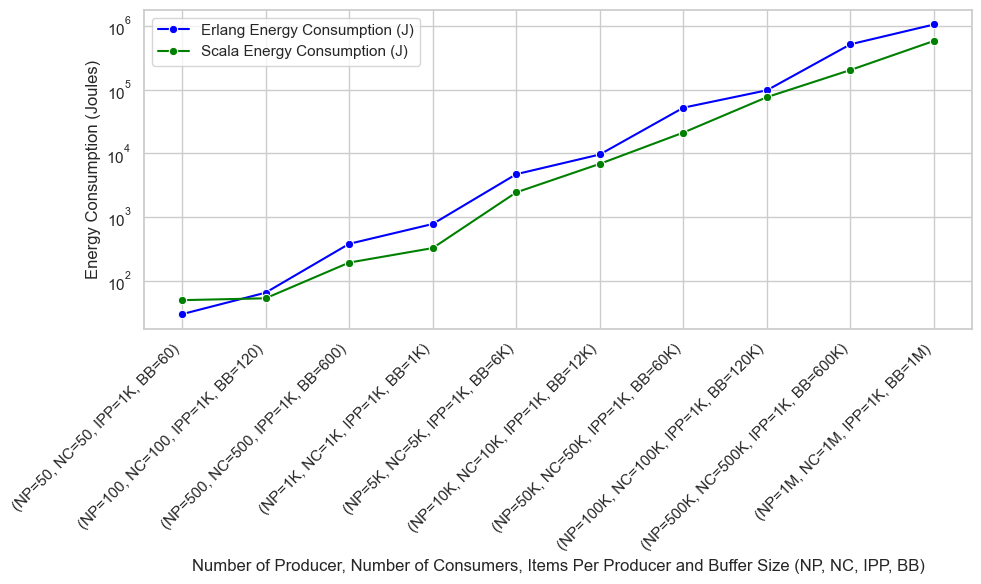

In [6]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="NP_NC_IPP_BB", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="NP_NC_IPP_BB", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Producer, Number of Consumers, Items Per Producer and Buffer Size (NP, NC, IPP, BB)")
plt.ylabel("Energy Consumption (Joules)")
# plt.title(" Erlang vs Scala Producers Consumer Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# # Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
